In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__) # 1.4.1
%matplotlib inline

1.4.0


In [2]:
from utils import load_mnist_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_mnist_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import network, train, utils
from layers import ReluLayer, BinaryFullyConnectedLayer, BatchNormLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 784], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)

nn.reset_graph()

# Hidden FC-1
nn.add_layer(BinaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden FC-2
nn.add_layer(BinaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden FC-3
nn.add_layer(BinaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Output SVM layer (linear part)
nn.add_layer(BinaryFullyConnectedLayer(out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

# Optimizer

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
opt.set_rho(0.5)
opt.set_ema_rates(0.999)

In [7]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

n_epochs = 250

for t in range(n_epochs):
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)
    
    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])

losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.911945, 0.47
Iter: 55 of 550 || Estimated train loss/acc: 0.755030, 0.55
Iter: 110 of 550 || Estimated train loss/acc: 0.657861, 0.65
Iter: 165 of 550 || Estimated train loss/acc: 0.567390, 0.70
Iter: 220 of 550 || Estimated train loss/acc: 0.509903, 0.78
Iter: 275 of 550 || Estimated train loss/acc: 0.413838, 0.88
Iter: 330 of 550 || Estimated train loss/acc: 0.403023, 0.80
Iter: 385 of 550 || Estimated train loss/acc: 0.343300, 0.86
Iter: 440 of 550 || Estimated train loss/acc: 0.309755, 0.92
Iter: 495 of 550 || Estimated train loss/acc: 0.233674, 0.97
Train loss/acc:  (0.21959417028860612, 0.95318181037902827) Test loss/acc:  (0.22122448980808257, 0.95200000286102293)
Epoch:  1
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99905002, 0.99905002, 0.99905002, 0.99905002]
rho:
[0.5,

Iter: 220 of 550 || Estimated train loss/acc: 0.007984, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000738, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.009482, 0.99
Iter: 385 of 550 || Estimated train loss/acc: 0.005101, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.001568, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.012453, 0.98
Train loss/acc:  (0.0080405182408338251, 0.99154546260833742) Test loss/acc:  (0.01633010513149202, 0.97810000896453853)
Epoch:  10
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99940127, 0.99940127, 0.99940127, 0.99940127]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.004393, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.002777, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.002188, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000617, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.004359, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.004530, 1.00
Iter

Train loss/acc:  (0.0043607576995749369, 0.99505455017089839) Test loss/acc:  (0.013653411278501153, 0.98160001277923581)
Epoch:  19
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99962264, 0.99962264, 0.99962264, 0.99962264]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.008136, 0.99
Iter: 55 of 550 || Estimated train loss/acc: 0.000599, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.008015, 0.99
Iter: 165 of 550 || Estimated train loss/acc: 0.001234, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000725, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000448, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.007762, 0.98
Iter: 385 of 550 || Estimated train loss/acc: 0.007591, 0.99
Iter: 440 of 550 || Estimated train loss/acc: 0.002666, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.005060, 1.00
Train loss/acc:  (0.0060244872023097491, 0.99267273426055913) Test loss/acc:  (0.017454042006283997, 0.97620000123977657)
Epo

Iter: 55 of 550 || Estimated train loss/acc: 0.000118, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.003853, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.001165, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.001930, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.003035, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.006728, 0.99
Iter: 385 of 550 || Estimated train loss/acc: 0.003848, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.007891, 0.99
Iter: 495 of 550 || Estimated train loss/acc: 0.001073, 1.00
Train loss/acc:  (0.0016057633134980941, 0.99834545612335202) Test loss/acc:  (0.011234099753201008, 0.98560000896453859)
Epoch:  29
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9997741, 0.9997741, 0.9997741, 0.9997741]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.005275, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.006800, 0.99
Iter: 110 of 550 || Estimated train loss/acc: 0.000302, 1.00
Iter: 16

Iter: 385 of 550 || Estimated train loss/acc: 0.003153, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000013, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.002500, 1.00
Train loss/acc:  (0.00077239775079016742, 0.99920000076293947) Test loss/acc:  (0.012243734055664391, 0.98400001049041752)
Epoch:  38
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9998576, 0.9998576, 0.9998576, 0.9998576]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000346, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.002745, 0.99
Iter: 110 of 550 || Estimated train loss/acc: 0.000461, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000024, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.004230, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.005922, 0.99
Iter: 330 of 550 || Estimated train loss/acc: 0.000011, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.005562, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000316, 1.00
Iter: 

Iter: 55 of 550 || Estimated train loss/acc: 0.001803, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.003096, 0.99
Iter: 165 of 550 || Estimated train loss/acc: 0.000246, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000072, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.006473, 0.99
Iter: 330 of 550 || Estimated train loss/acc: 0.000061, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000415, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.002085, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000297, 1.00
Train loss/acc:  (0.00042600262219071863, 0.99952727317810064) Test loss/acc:  (0.012960814471589401, 0.98400001287460326)
Epoch:  48
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99991465, 0.99991465, 0.99991465, 0.99991465]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000441, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.002791, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.008617, 0.99
Ite

Iter: 385 of 550 || Estimated train loss/acc: 0.000027, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000951, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000218, 1.00
Train loss/acc:  (0.00013368433115968126, 0.99987272739410404) Test loss/acc:  (0.0100351877277717, 0.98750001192092896)
Epoch:  57
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99994624, 0.99994624, 0.99994624, 0.99994624]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000242, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000521, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000194, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000063, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000339, 1.00
Iter

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000163, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000251, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000084, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000018, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000122, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (8.8789971099588038e-05, 0.99989090919494628) Test loss/acc:  (0.011558122240421654, 0.98640001296997071)
Epoch:  67
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99996781, 0.99996781, 0.99996781, 0.99996781]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000094, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Ite

Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000061, 1.00
Train loss/acc:  (2.8153798749289392e-08, 1.0) Test loss/acc:  (0.01074959704419598, 0.98850001096725459)
Epoch:  76
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99997973, 0.99997973, 0.99997973, 0.99997973]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000056, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000110, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (4

Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000088, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (1.0863788123639428e-09, 1.0) Test loss/acc:  (0.011954073000149492, 0.98790001153945928)
Epoch:  86
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99998784, 0.99998784, 0.99998784, 0.99998784]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000408, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 |

Iter: 55 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000012, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000546, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000146, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000059, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (3.6695036711555738e-06, 1.0) Test loss/acc:  (0.011941929315216839, 0.98780001163482667)
Epoch:  96
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999273, 0.99999273, 0.99999273, 0.99999273]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000125, 1.00
Iter: 165 of 550 ||

Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (5.6363172585737297e-09, 1.0) Test loss/acc:  (0.011730759582133033, 0.9884000110626221)
Epoch:  105
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999541, 0.99999541, 0.99999541, 0.99999541]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000093, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (2.9770291637925601e-08, 1.0) Test loss/acc:  (0.0119720234521

Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000037, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (2.464692161910617e-07, 1.0) Test loss/acc:  (0.012106774672513154, 0.9884000110626221)
Epoch:  115
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999726, 0.99999726, 0.99999726, 0.99999726]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 ||

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.012915439154021442, 0.98850001096725459)
Epoch:  125
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999839, 0.99999839, 0.99999839, 0.99999839]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train l

Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.012343623139045121, 0.98920001029968263)
Epoch:  134
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999893, 0.99999893, 0.99999893, 0.99999893]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000273, 1.00
Train loss/acc:  (9.8222006768496203e-07, 1.0) Test loss/acc:  (0.0121664876813702, 0.98800000905990604)
Epoch:  135
========= Begin epoch =========
batch_siz

Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000022, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.012814316526055336, 0.98900001049041752)
Epoch:  144
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss

Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000007, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.013178688879124821, 0.98920001029968263)
Epoch:  154
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000001, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.012994135078042746, 0.98910001039505002)
Epoch:  164
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000079, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (4.6905293412568096e-08, 1.0) Test loss/acc:  (0.013486339459195733, 0.98930001020431524)
Epoch:  174
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000168, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Es

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.013825392870930955, 0.98930001020431524)
Epoch:  184
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000609, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.014049122140277178, 0.98820001125335688)
Epoch:  194
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.014518056379165501, 0.98890001058578492)
Epoch:  204
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000017, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.013639693660661579, 0.98890001058578492)
Epoch:  214
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.01405782983172685, 0.98850001096725459)
Epoch:  224
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/a

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.014132892314810306, 0.98870001077651981)
Epoch:  234
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000022, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000000, 1.00
Train loss/acc:  (0.0, 1.0) Test loss/acc:  (0.014580316731007769, 0.98810001134872438)
Epoch:  244
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.5, 0.5, 0.5, 0.5]
Iter: 0 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 165 of 550 || Estimated train loss/

In [11]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True))

Train:  (0.0, 1.0)
Valid:  (0.011915930546820164, 0.99099999666213989)
Test:  (0.014516581781208515, 0.9879000186920166)


In [12]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  209
Train acc:  1.0
Valid acc:  0.992400007248
Test acc:  0.9892000103


Final results:  [ 0.          1.          0.01191593  0.99100001  0.01451658  0.98790001]


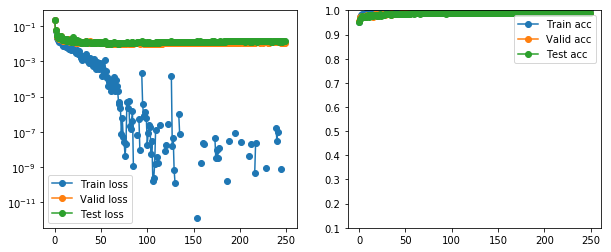

In [13]:
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])